In Laundau theory the free energy of a ferromagnet is given by

\begin{equation}
F(m) = F_0 + a \left( \frac{T - T_c}{T_c} \right) m^2 + bm^4 - hm
\end{equation}

where $F_0, a, b > 0$ are constants. Knowing that the partition function is dominated by the minimum energy of the free energy:

1. Represent the magnetization as a function of the temperature in the absence of a field.
2. Represent the isothermal curves of magnetization as a function of the field.

---
I rewrite the equation as:

\begin{equation}
F(m) - F_0 = a \left( T' - 1 \right) m^2 + bm^4 - hm
\end{equation}

Where $h$ is the field and $T'$ is the temperature quotient.

The magnetization at minimum energy is found by taking the derivative:

\begin{equation}
\frac{\partial F}{\partial m} = 2a \left( T' - 1 \right) m + 4bm^3 - h = 0
\end{equation}

In the absence of a field ($h = 0$) this simplifies to:

\begin{equation}
m(T') =
\begin{cases}
\frac{1}{2b} \sqrt {- a \left( T' - 1 \right)} , & T' < 1 \\
0 , & T' > 1
\end{cases}
\end{equation}

However in the presence of a field we are left with a cubic polynomial. I can find its roots through the transcendental approximation methods developed earlier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import approx

C:\Users\Utilizador\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


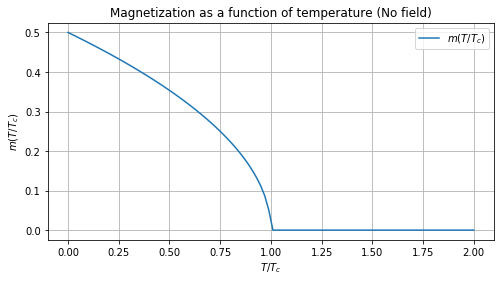

In [2]:
a = 1
b = 1

T = np.linspace(0, 2, 100)
m = lambda T: 1/(2*b) * np.sqrt(-a*(T - 1))
m = np.where(T < 1, m(T), 0)

width, height = plt.figaspect(.5)
plt.figure(figsize=(width, height))
plt.title('Magnetization as a function of temperature (No field)')
plt.plot(T, m, label='$m(T/T_c)$')
plt.xlabel('$T/T_c$')
plt.ylabel('$m(T/T_c)$')
plt.legend(loc='best')
plt.grid(True)

plt.show()

In [3]:
def Magnetization(x, y, args):
    
    '''Estimating roots'''
    
    estimated_root = 0
    
    for i in range(len(x)-1):
        if y(x[i], *args) * y(x[i+1], *args) < 0:
            estimated_root = (x[i] + x[i+1])/2
            break
            
    '''Approximating root with Bolzano'''
    
    iterations = 100
    stop_condition = 1e-16
    
    dx = x[1] - x[0]

    first_point = estimated_root - dx
    second_point = estimated_root + dx
    point, error = approx.bolzano(y, estimated_root, first_point, second_point, iterations, stop_condition, args)[0:2]
    x_root = point[-1]
    error_y = abs(y(x_root, *args))
    
    return x_root, error_y

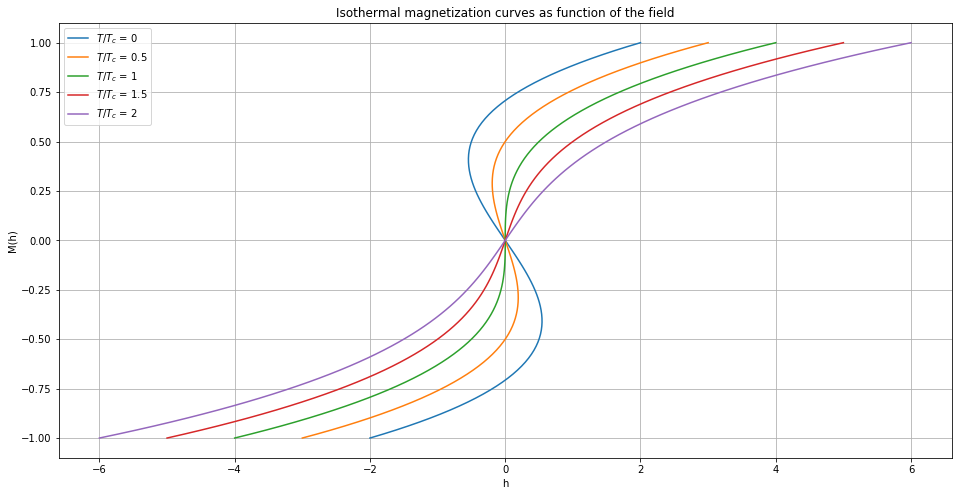

In [5]:
a = 1
b = 1

T = 1

M = np.linspace(-1, 1, 100)
H = np.linspace(-450, 500, 100)

f = lambda h, m, T, a, b: 2*a * (T - 1) * m + 4*b*m**3 - h

args = [m, T, a, b]

m_array = np.zeros(len(M))
h_array = np.zeros(len(M))

width, height = plt.figaspect(0.5) * 2
plt.figure(figsize=(width, height))
plt.title('Isothermal magnetization curves as function of the field')

for T in [0, 0.5, 1, 1.5, 2]:
    for i in range(len(M)):
        m = M[i]
        args = [m, T, a, b]
        h_array[i] = Magnetization(H, f, args)[0]

    plt.plot(h_array, M, label='$T/T_c$ = ' + repr(T))

plt.xlabel('h')
plt.ylabel('M(h)')
plt.legend(loc='best')
plt.grid(True)
plt.show()